<a href="https://colab.research.google.com/github/Davdsson/Davdsson/blob/master/derinProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.utils.np_utils import to_categorical
from sklearn.ensemble import AdaBoostClassifier
from tensorflow.keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from tensorflow.python.keras import backend
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras import optimizers
from matplotlib.pyplot import imread
from sklearn.metrics import f1_score 
from keras.models import Sequential
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
from sklearn import metrics
from sklearn.svm import SVC
import plotly.tools as tls
import unittest as units
import tensorflow as tf
from PIL import Image
import pandas as pd
import numpy as np
%matplotlib inline
import PIL as pil
import cv2 as cv2
import warnings
import glob
import os


# VERI OKUMA IŞLEMLERI

In [ ]:
# Loads the data required for detecting the license plates from cascade classifier.
plate_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/araba_plaka.xml')
# add the path to 'araba_plaka.xml' file.
genel_data_set_path = glob.glob("/content/drive/MyDrive/genel_data_seti/*.jpg")
dataSet_1_path = glob.glob("/content/drive/MyDrive/dataSet_1/*.jpg")
dataSet_2_path = glob.glob("/content/drive/MyDrive/dataSet_2/*.jpg")

In [ ]:
mpl_img_read = plt.imread(dataSet_1_path[1])
mpl_img_read_2 = plt.imread(dataSet_2_path[1]) 
cv2_img_read= cv2.imread(dataSet_1_path[1])
cv2_img_read_2= cv2.imread(dataSet_2_path[1])
T_img =cv2.imread(dataSet_2_path[1])

# VERI GÖRSELLESTIRME

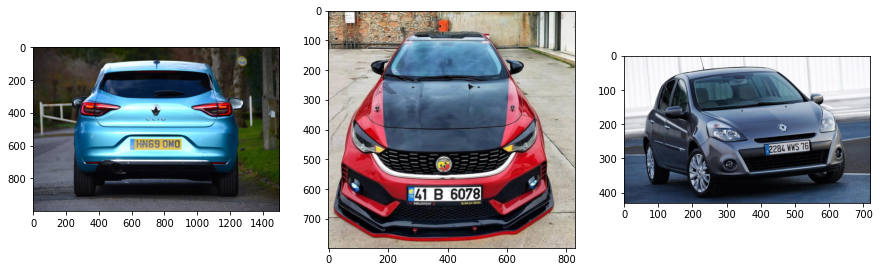

In [ ]:
fig,ax= plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(plt.imread(dataSet_2_path[4]))
ax[1].imshow(mpl_img_read_2)
ax[2].imshow(plt.imread(dataSet_2_path[2]) )

plt.show()

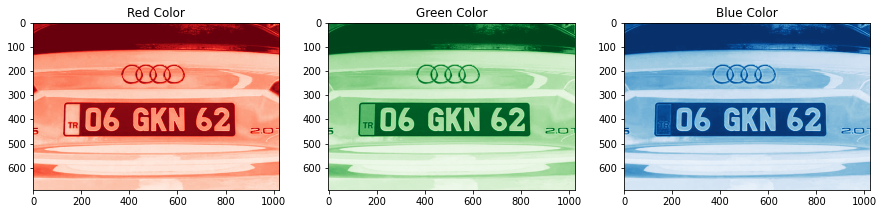

In [ ]:
#display RGB channels of image

fig,ax= plt.subplots(1,3, figsize=(15,5))

ax[0].imshow(mpl_img_read[:,:,0], cmap='Reds'),
ax[1].imshow(mpl_img_read[:,:,1], cmap='Greens')
ax[2].imshow(mpl_img_read[:,:,2], cmap='Blues')
ax[0].set_title('Red Color')
ax[1].set_title('Green Color')
ax[2].set_title('Blue Color')
plt.show()

# ------------------------data Preprocessing Exemple-------------------------

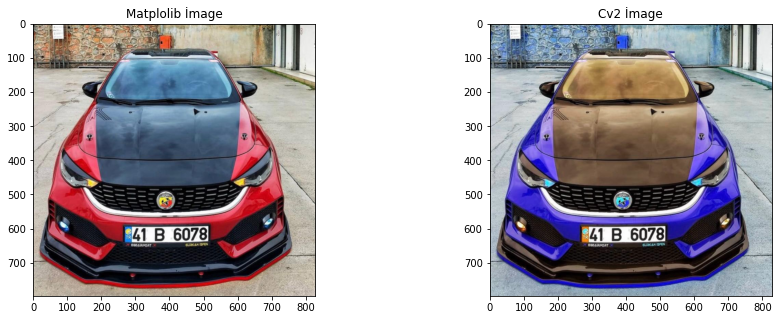

In [ ]:
#display Matplolib İmage and CV2 image  to see the diference between them

fig,ax= plt.subplots(1,2, figsize=(15,5))

ax[0].imshow(mpl_img_read_2) # matplolib image
ax[1].imshow(cv2_img_read_2) # cv2 image

ax[0].set_title('Matplolib İmage')
ax[1].set_title('Cv2 İmage')

plt.show()

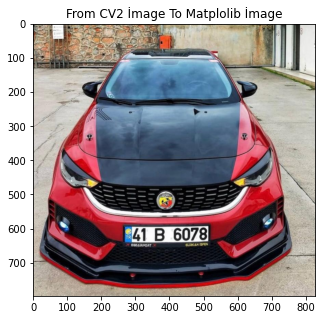

In [ ]:
#Convert image from BGR to RGB : Matplolib image

converted_img_to_rgb = cv2.cvtColor(cv2_img_read_2,cv2.COLOR_BGR2RGB)

fig,ax= plt.subplots(figsize=(15,5))

ax.imshow(converted_img_to_rgb)
ax.set_title('From CV2 İmage To Matplolib İmage')

plt.show()

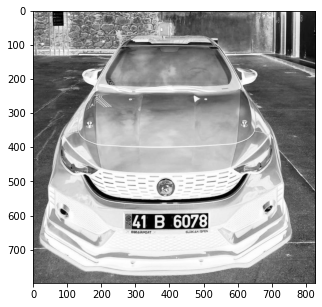

In [ ]:
      #let's convert our image to GreyColor befor processing


converted_img_to_rgb = cv2.cvtColor(cv2_img_read_2,cv2.COLOR_RGB2GRAY)

fig,ax= plt.subplots(figsize=(15,5))

ax.imshow(converted_img_to_rgb,cmap='Greys')

plt.show()

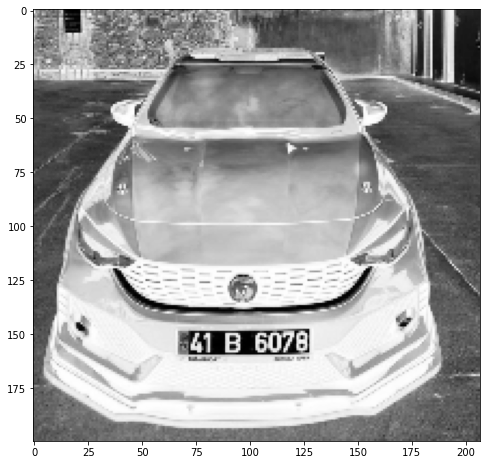

In [ ]:
#Resizing and scalling
resized_img = cv2.resize(converted_img_to_rgb ,None, fx= 0.25,fy=0.25)
#resized_img = cv2.resize(mpl_img_read_2 ,(200,100), interpolation=cv2.INTER_CUBIC)

fig,ax= plt.subplots(figsize=(8,8))
ax.imshow(resized_img, cmap='Greys')

plt.show()

In [ ]:
print(converted_img_to_rgb/255)

[[0.52156863 0.50980392 0.57647059 ... 0.88235294 0.87843137 0.87843137]
 [0.34901961 0.32156863 0.38823529 ... 0.88235294 0.88235294 0.87843137]
 [0.11372549 0.09019608 0.14901961 ... 0.88627451 0.88235294 0.88235294]
 ...
 [0.72156863 0.65098039 0.65882353 ... 0.78039216 0.74117647 0.70196078]
 [0.67058824 0.64313725 0.69411765 ... 0.76470588 0.74509804 0.72156863]
 [0.69019608 0.68235294 0.73333333 ... 0.7254902  0.74117647 0.74117647]]


<function matplotlib.pyplot.show>

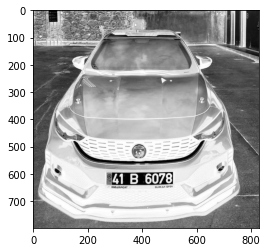

In [ ]:
# The Visualition of Converted image Normalization of Convert
Rz_image = converted_img_to_rgb/255 # Resized image in Array representation : Normal Size/255

plt.imshow(Rz_image,cmap='Greys')

plt.show

In [ ]:
#image pixel representation

<function matplotlib.pyplot.show>

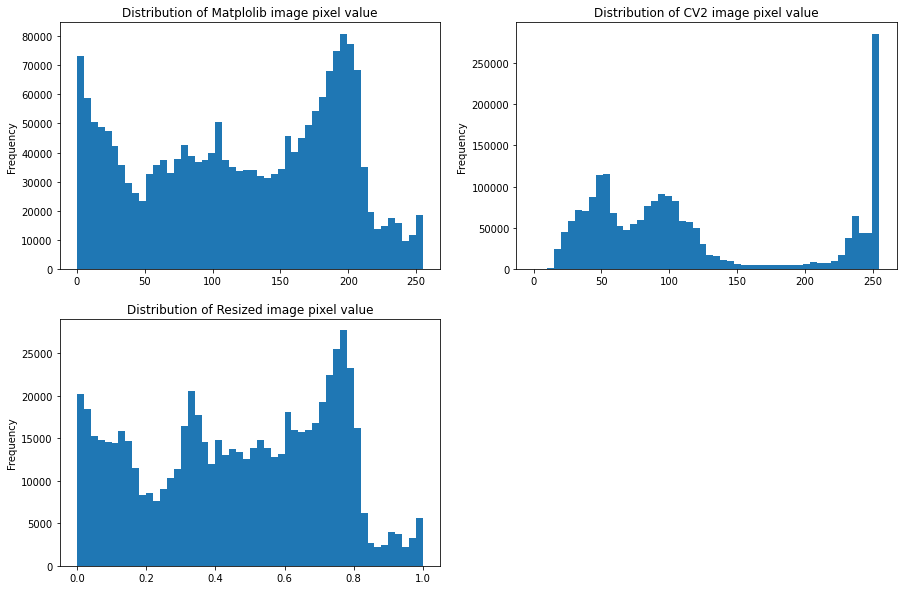

In [ ]:
from matplotlib import colors
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
#fig,ax= plt.subplots(1,3, figsize=(15,5))
pd.Series(mpl_img_read_2.flatten()).plot(kind='hist', bins=50, title='Distribution of Matplolib image pixel value')

plt.subplot(2,2,2)
pd.Series(cv2_img_read.flatten()).plot(kind='hist', bins=50, title='Distribution of CV2 image pixel value')
plt.subplot(2,2,3)
pd.Series(Rz_image.flatten()).plot(kind='hist', bins=50, title='Distribution of Resized image pixel value')

plt.show

# ---------------------------------CAR PLATE DETECTION-------------------------------

In [ ]:
def detect_plate_function(img, text=''): # This is for detecting car.
    plate_img = img.copy()
    roi = img.copy()
    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.2, minNeighbors = 7) # detects numberplates and returns the coordinates and dimensions of detected license plate's contours.
    for (x,y,w,h) in plate_rect:
        roi_ = roi[y:y+h, x:x+w, :] # extracting the Region of Interest of license plate for blurring.
        plate = roi[y:y+h, x:x+w, :]
        cv2.rectangle(plate_img, (x+2,y), (x+w-3, y+h-5), (0,255,0), 13) # finally representing the detected contours by drawing rectangles around the edges.
    if text!='':
        plate_img = cv2.putText(plate_img, text, (x-w//2,y-h//2), 
                                cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.5, (0,255,0), 13, cv2.LINE_AA)
        
    return plate_img, plate # returning the processed image and image itself

In [ ]:
#-------------------------Display our image process-------------------- 

In [ ]:
def display(img_, title=''):
    img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10,6))
    ax = plt.subplot(111)
    ax2 = plt.subplot(122)
    ax2.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()


In [ ]:
mpl_img_read = plt.imread(dataSet_1_path[3])
output_img, plate = detect_plate_function(mpl_img_read)  #calling of plate detection function 

:

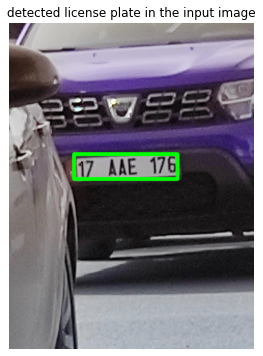

In [ ]:
display(output_img, 'detected license plate in the input image') #calling of display image function to show us the results of plate detection

# ----------------------------plate screen shot----------------------------

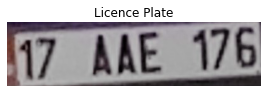

In [ ]:
display(plate, 'Licence Plate') 

# ------------------------Licence Plate Preprocessing------------------------

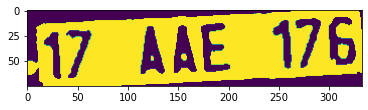

In [ ]:
# Preprocess cropped license plate image
image = plate
img_lp = cv2.resize(image, (333, 75)) # image Resizing
img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY) # image conversion from cv2 to gray or Matplolib
_, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) # convert from Mtlplb to binary
img_binary_lp = cv2.erode(img_binary_lp, (3,3)) # Eroding binary image
img_binary_lp = cv2.dilate(img_binary_lp, (3,3)) # dilating  ERoding image
plt.imshow(img_binary_lp)

# --------------------------Licence Plate Segmentation------------------------- 
Licence Plate Contour Finding

In [ ]:
# Licence plate contours matching 
def find_contours(dimensions, img) :

    # detect all contours in the Licence plate image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    #potential dimensions Retrieving
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    
    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
    
    ii = cv2.imread('contour.jpg')
    
    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        # detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        # checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to use it later for indexing the contours

            char_copy = np.zeros((44,24))
            # extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ii, cmap='gray')

            # Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) # List that stores the character's binary image (unsorted)
            
    # Return characters on ascending order with respect to the x-coordinate (most-left character first)
            
    plt.show()
    # arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res

# Character Segmentation Process

In [ ]:
# Check characters in the resulting images
def segment_characters(image) :

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Make borders white
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/6,
                       LP_WIDTH/2,
                       LP_HEIGHT/10,
                       2*LP_HEIGHT/3]
    plt.imshow(img_binary_lp, cmap='gray') 
    plt.show()
    cv2.imwrite('contour.jpg',img_binary_lp)

    # Get contours within cropped license plate by calling find_contours function
    char_list = find_contours(dimensions, img_binary_lp) 

    return char_list

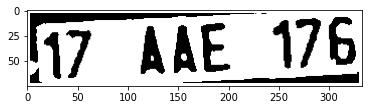

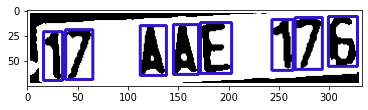

In [ ]:
# Let's see the segmented characters
char = segment_characters(plate)

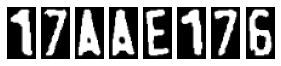

In [ ]:
length = len(char)
for i in range(0, length):
    plt.subplot(1, 10, i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')


    

-----------------------------------------------------------------------------------------------SAVE SEGMENTATİON DATA RESULT------------------------------------------------------------------

In [ ]:
cv2.imwrite ('/content/drive/MyDrive/derin_projesi/tahmin_data/1/1.png', char[0])
cv2.imwrite ('/content/drive/MyDrive/derin_projesi/tahmin_data/2/2.png', char[1])
cv2.imwrite ('/content/drive/MyDrive/derin_projesi/tahmin_data/3/3.png', char[2])
cv2.imwrite ('/content/drive/MyDrive/derin_projesi/tahmin_data/4/4.png', char[3])
cv2.imwrite ('/content/drive/MyDrive/derin_projesi/tahmin_data/5/5.png', char[4])
cv2.imwrite ('/content/drive/MyDrive/derin_projesi/tahmin_data/6/6.png', char[5])
cv2.imwrite ('/content/drive/MyDrive/derin_projesi/tahmin_data/7/7.png', char[6])
cv2.imwrite ('/content/drive/MyDrive/derin_projesi/tahmin_data/8/8.png', char[7])
#cv2.imwrite ('/content/drive/MyDrive/derin_projesi/tahmin_data/9/9.png', char[8])



True

# New Section

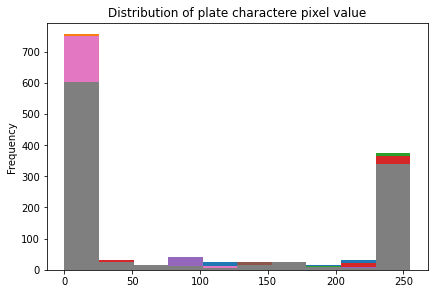

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
#fig,ax= plt.subplots(1,3, figsize=(15,5))
length = len(char)
for i in range(0, length):
  pd.Series(char[i].flatten()).plot(kind='hist', bins=10, title='Distribution of plate charactere pixel value')


#NEXT WORK WİLL BE CHARACTER RECOGNİTİON USİNG: MACHINE LEARNING & DEEP LEARNING
                          

----------------------------------------------------------------DATA PRE-PROCESSING------------------------------------------------------

In [ ]:
def prepare_dataSet(img_folder):  # data preprocessing function : conversion,resizing,normalization...
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
            
            for file in os.listdir(os.path.join(img_folder, dir1)):
                if dir1== 0:
                    print(dir1)
                image_path= os.path.join(img_folder, dir1,  file)
                image= cv2.imread( image_path, cv2.IMREAD_GRAYSCALE)
                if image is None:
                    print(dir1, img_folder)
                else:
                    image=cv2.resize(image, (64, 64),interpolation = cv2.IMREAD_GRAYSCALE)
                    image=np.array(image)
                    image = image.astype('float32')
                    image =image/255 
                    img_data_array.append(image)
                    class_name.append(dir1)
    return img_data_array,class_name
# extract the image array and class name
train_set,train_label =prepare_dataSet('/content/drive/MyDrive/derin_projesi/data/train') # training
test_set,test_label =prepare_dataSet('/content/drive/MyDrive/derin_projesi/data/val')   # testing


In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(train_label))} # Target Label to numpy and unique value

test_dict={k: v for v, k in enumerate(np.unique(test_label))}    # Testing data Label and unique value

#pred_dict={k: v for v, k in enumerate(np.unique(pred_label))}   # Prediction data Label and unique value
#target_dict

In [ ]:
print(" Training Class Name: ")
print(" ")
print(np.unique(target_dict))
print(" ")
print(" ***************************************************************** ")
print(" ")
print(" Testing Class Name: ")
print(" ")
print(np.unique(test_dict))
print(" ")
print(" ***************************************************************** ")


 Training Class Name: 
 
[{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35}]
 
 ***************************************************************** 
 
 Testing Class Name: 
 
[{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35}]
 
 ***************************************************************** 


In [ ]:
target_val =  [target_dict[train_label[i]] for i in range(len(train_label))] # Target data 
test_val=  [test_dict[test_label[i]] for i in range(len(test_label))]
#target_val

X_input_data = np.array(train_set) # store images in X_input_data
X_test_data = np.array(test_set) # store images in X_test_data

training_label=np.array(target_val)
test_label=np.array(test_val)
Y_label = training_label.reshape(-1,1)# store labels in Y_label
Y_test_label = test_label.reshape(-1,1)# store test labels in Y_test_label


Xdata = X_input_data # store images in Xdata
Ydata = Y_label.reshape(-1,1) # store labels in Ydata

X_testing_data = X_test_data  # store labels in X_testing_data
Y_testing_label = Y_test_label.reshape(-1,1) # store test labels in Y_testing_label

In [ ]:
#-------------------------------------------- Let's Split our data-------------------------------
#x_train, x_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size = 0.3, random_state=2)

x_train = Xdata
y_train = Ydata

x_test = X_testing_data
y_test = Y_testing_label

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (950, 64, 64)
x_test:  (295, 64, 64)
y_train:  (950, 1)
y_test:  (295, 1)


#------------------------------------------- DATA NORMALISATION FOR MACHINE LEARNING MODEL-------------------------------

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
#X_pred_data_Input=X_pred_data.reshape(X_pred_data.shape[0], X_pred_data.shape[1]*X_pred_data.shape[2])
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (950, 4096)
x_test:  (295, 4096)
y_train:  (950, 1)
y_test:  (295, 1)


------------------------------------------------------------------------------------------------MODEL LEARNING PHASE------------------------------------------------------------

------------------------------------------------------------------------------------------------MACHINE LEARNING model definition --------------------------------------------------------------------------

In [ ]:
MLP_model=MLPClassifier(max_iter=1500,hidden_layer_sizes=(200),activation="relu",solver='adam')
RF_model=RandomForestClassifier(bootstrap=True,criterion="gini", n_estimators = 500, random_state = 2,max_depth=500)
knn_model = KNeighborsClassifier(n_neighbors=5)
G_model=GaussianNB()
SVC_model = SVC()


------------------------------------------------------------------------------------------------data scaling --------------------------------------------------------------------------:

In [ ]:
scaler = StandardScaler()
x_train_transformed = scaler.fit_transform(x_train) 


------------------------------------------------------------------------------------------------Model Training--------------------------------------------------------------------------:

In [ ]:
knn_model.fit(x_train,y_train)
RF_model.fit(x_train,y_train)
G_model.fit(x_train,y_train)
SVC_model.fit(x_train,y_train)
MLP_model.fit(x_train,y_train)


MLPClassifier(hidden_layer_sizes=200, max_iter=1500)

------------------------------------------------------------------------------------------------Model Testing Without scaler--------------------------------------------------------------------------:

In [ ]:
kn =  knn_model.score(x_test,y_test)
RF =  RF_model.score(x_test,y_test)
G  =   G_model.score(x_test,y_test)
SVC= SVC_model.score(x_test,y_test)
MLP= MLP_model.score(x_test,y_test)

print('BEFOR PREPROCESSİNG by data Scaling')
print("")
print('KNN Score      = ',kn)
print('Random F Score = ',RF)
print('Bayes Score    = ',G)
print('SVC Score      =',SVC)
print('MLP Score      =',MLP)



BEFOR PREPROCESSİNG by data Scaling

KNN Score      =  0.9322033898305084
Random F Score =  0.9084745762711864
Bayes Score    =  0.8610169491525423
SVC Score      = 0.9898305084745763
MLP Score      = 1.0


------------------------------------------------------------------------------------------------score graphic--------------------------------------------------------------------------:

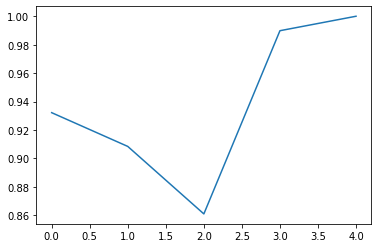

In [ ]:
score_array_list=[kn, RF,G,SVC,MLP]
plt.plot(score_array_list)


------------------------------------------------------------------------------------------------TESTING WITH SACLER--------------------------------------------------------------------------:

In [ ]:
list_accuracy=[]
x_test_transformed = scaler.transform(x_test)


kn =  knn_model.score(x_test_transformed,y_test)
RF =  RF_model.score(x_test_transformed,y_test)
G  =   G_model.score(x_test_transformed,y_test)
SVC= SVC_model.score(x_test_transformed,y_test)
MLP= MLP_model.score(x_test_transformed,y_test)
list_accuracy.append(MLP)

print('SCORES SCALER :')
print('')
print('KNN Score                  = ',kn)
print('Random F Score             = ',RF)
print('Bayes Score                = ',G)
print('SVC Score                  =',SVC)
print('MLP Score                  =',MLP)



SCORES SCALER :

KNN Score                  =  0.8610169491525423
Random F Score             =  0.823728813559322
Bayes Score                =  0.020338983050847456
SVC Score                  = 0.08135593220338982
MLP Score                  = 0.7661016949152543


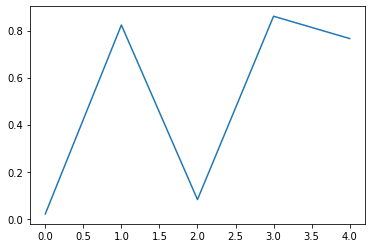

In [ ]:
score_array_list=[G,RF,SVC,kn,MLP]
plt.plot(score_array_list)


------------------------------------------------------------------------------------------------LEARNING CURVE--------------------------------------------------------------------------:

[ 23  47  70  94 118 141 165 188 212 236]


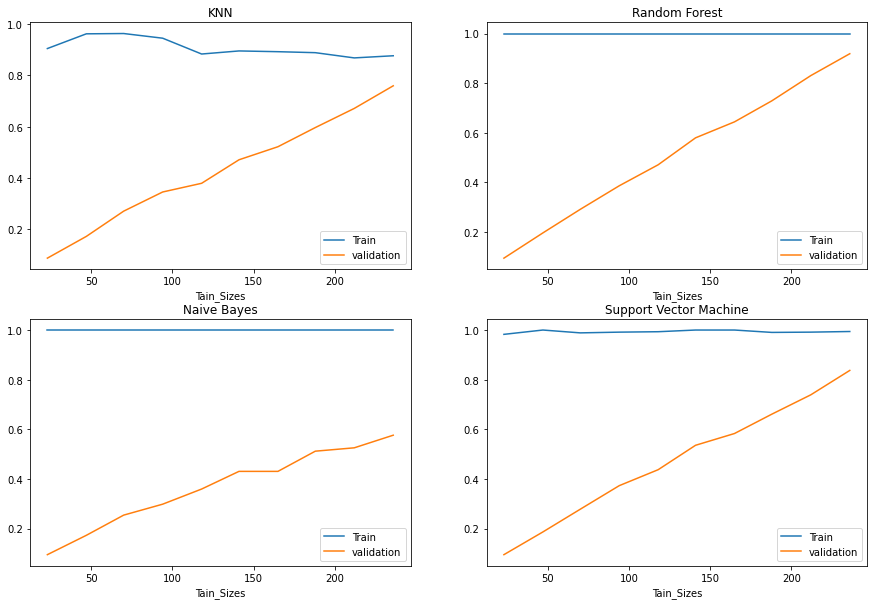

In [ ]:

import warnings
warnings.filterwarnings('ignore')



N, Knn_train_score, knn_val_score=learning_curve(knn_model,x_test_transformed,y_test,train_sizes=np.linspace(0.1, 1, 10),cv=5)
N, RF_train_score, RF_val_score=learning_curve(RF_model,x_test_transformed,y_test,train_sizes=np.linspace(0.1, 1, 10),cv=5)
N, G_train_score, G_val_score=learning_curve(G_model,x_test_transformed,y_test,train_sizes=np.linspace(0.1, 1, 10),cv=5)
N, SVC_train_score, SVC_val_score=learning_curve(SVC_model,x_test_transformed,y_test,train_sizes=np.linspace(0.1, 1, 10),cv=5)
N, MLP_train_score, MLP_val_score=learning_curve(MLP_model,x_test_transformed,y_test,train_sizes=np.linspace(0.1, 1, 10),cv=5)


print(N)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(N,Knn_train_score.mean(axis=1),label='Train')
plt.plot(N,knn_val_score.mean(axis=1),label='validation')
plt.xlabel('Tain_Sizes')
plt.title('KNN')
plt.legend()


plt.subplot(2,2,2)
plt.plot(N,RF_train_score.mean(axis=1),label='Train')
plt.plot(N,RF_val_score.mean(axis=1),label='validation')
plt.xlabel('Tain_Sizes')
plt.title('Random Forest')
plt.legend()


plt.subplot(2,2,3)

plt.plot(N,G_train_score.mean(axis=1),label='Train')
plt.plot(N,G_val_score.mean(axis=1),label='validation')
plt.xlabel('Tain_Sizes')
plt.title('Naive Bayes')
plt.legend()


plt.subplot(2,2,4)
plt.plot(N,SVC_train_score.mean(axis=1),label='Train')
plt.plot(N,SVC_val_score.mean(axis=1),label='validation')
plt.xlabel('Tain_Sizes')
plt.title('Support Vector Machine')
plt.legend()
plt.show()


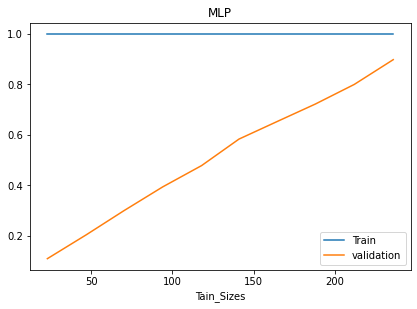

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(N,MLP_train_score.mean(axis=1),label='Train')
plt.plot(N,MLP_val_score.mean(axis=1),label='validation')
plt.xlabel('Tain_Sizes')
plt.title('MLP')
plt.legend()

------------------------------------------------------------------------------------------------Error For each algo--------------------------------------------------------------------------:

In [ ]:

knn_Pred=knn_model.predict(x_test_transformed)
RF_Pred =RF_model.predict(x_test_transformed)
G_Pred  =G_model.predict(x_test_transformed)
SVC_Pred=SVC_model.predict(x_test_transformed)
MLP_Pred=MLP_model.predict(x_test_transformed)


print('KNN ERRor:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn_Pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, knn_Pred)))
print('')
print('Random Forest ERRor:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, RF_Pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, RF_Pred)))
print('')
print('Gaussian ERRor:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, G_Pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, G_Pred)))
print('')
print('SVC ERRor :')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, SVC_Pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,SVC_Pred)))
print('')
print('MLP ERRor :')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, MLP_Pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, MLP_Pred)))




KNN ERRor:
Mean Absolute Error: 1.5694915254237287
Root Mean Squared Error: 5.099351902988111

Random Forest ERRor:
Mean Absolute Error: 2.993220338983051
Root Mean Squared Error: 7.479010176509922

Gaussian ERRor:
Mean Absolute Error: 9.942372881355933
Root Mean Squared Error: 12.08627180323589

SVC ERRor :
Mean Absolute Error: 8.844067796610169
Root Mean Squared Error: 10.70387225988484

MLP ERRor :
Mean Absolute Error: 2.4440677966101694
Root Mean Squared Error: 6.137133433424844


------------------------------------------------------------------------------------------------Accuray for each Algorithm--------------------------------------------------------------------------:

In [ ]:
list_accuracy=[]
list_names=[]
print('KNN Accurracy:')
print('Root Mean Accurracy:', accuracy_score(y_test, knn_Pred))
list_accuracy.append(accuracy_score(y_test, knn_Pred))
list_names.append("KNN")
print('')
print('Random Accurracy:')
print('Accurracy:',  accuracy_score(y_test, RF_Pred))

list_accuracy.append(accuracy_score(y_test, RF_Pred))
list_names.append("RF")
print('')
print('Gaussian Accurracy:')
print('Accurracy:',  accuracy_score(y_test, G_Pred))
list_accuracy.append(accuracy_score(y_test, G_Pred))
list_names.append("Gaussian")
print('')
print('SVC Accurracy :')
print('Accurracy:',  accuracy_score(y_test, SVC_Pred))
list_accuracy.append(accuracy_score(y_test, SVC_Pred))
list_names.append("SVM")
print('')
print('MLP Accurracy :')
print('Accurracy:',accuracy_score(y_test, MLP_Pred)  )
list_accuracy.append(accuracy_score(y_test, MLP_Pred))
list_names.append("MLP")

KNN Accurracy:
Root Mean Accurracy: 0.8610169491525423

Random Accurracy:
Accurracy: 0.823728813559322

Gaussian Accurracy:
Accurracy: 0.020338983050847456

SVC Accurracy :
Accurracy: 0.08135593220338982

MLP Accurracy :
Accurracy: 0.7661016949152543


------------------------------------------------------------------------------------------------Mean of Validation Score--------------------------------------------------------------------------:

In [ ]:
print('MLP Validation Score=',MLP_val_score.mean(axis=1).mean())
print('SVM Validation Score=',SVC_val_score.mean(axis=1).mean())
print('Gaussian Validation Score=',G_val_score.mean(axis=1).mean())
print('KNN Validation Score=',knn_val_score.mean(axis=1).mean())
print('Rand Forest Validation Score=',RF_val_score.mean(axis=1).mean())

MLP Validation Score= 0.5138983050847459
SVM Validation Score= 0.472542372881356
Gaussian Validation Score= 0.3654237288135593
KNN Validation Score= 0.4277966101694915
Rand Forest Validation Score= 0.5142372881355932


 ------------------------------------------------------------------------------------------------------------------------------DEEP LEARNING

------------------------------------------------------------------------------------------------------------CONVOLUTION NEURAL NETWORK CNN----------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------DATA  MINING FOR CNN-----------------------------------------------------

In [ ]:
cnn_x_train = x_train.reshape(-1,64,64,1) # Training data Reshaping
cnn_x_test = x_test.reshape(-1,64,64,1)   # Testing data Reshaping

cnn_y_train_ = to_categorical(y_train) # training data Label  transformation for cnn learning
cnn_y_test_ = to_categorical(y_test)   # testing data Label  transformation for cnn learning

print(" Reshaped Data result: ")
print("")
print("x_train: ",cnn_x_train.shape)
print("x_test: ",cnn_x_test.shape)
print("")
print(" Training & Testing data Label transformation result: ")
print("")
print("y_train_ shape: ",cnn_y_train_.shape)
print("y_test_ shape: ",cnn_y_test_.shape)



 Reshaped Data result: 

x_train:  (950, 64, 64, 1)
x_test:  (295, 64, 64, 1)

 Training & Testing data Label transformation result: 

y_train_ shape:  (950, 36)
y_test_ shape:  (295, 36)


In [ ]:
model = Sequential()

model.add(Conv2D(filters = 10, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 15, kernel_size = (6,6),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 150, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))

model.add(Flatten())
model.add(Dense(25, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(36, activation = "softmax"))

optimizer = RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=2, 
                                            factor=0.7, 
                                            min_lr=0.000001)

epoch = 35
batch_size = 20

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=5,  
        zoom_range = 0.05, 
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=False,  
        vertical_flip=False)  
datagen.fit(cnn_x_train)

history = model.fit(cnn_x_train,cnn_y_train_, batch_size=20,
epochs = epoch, 
validation_data = (cnn_x_test,cnn_y_test_),
verbose = 2, 
steps_per_epoch=50
                )



Epoch 1/35
50/50 - 9s - loss: 24.2793 - accuracy: 0.0596 - val_loss: 3.5463 - val_accuracy: 0.0712 - 9s/epoch - 172ms/step
Epoch 2/35
50/50 - 9s - loss: 3.5602 - accuracy: 0.0677 - val_loss: 3.5322 - val_accuracy: 0.0712 - 9s/epoch - 174ms/step
Epoch 3/35
50/50 - 7s - loss: 3.5547 - accuracy: 0.0657 - val_loss: 3.5247 - val_accuracy: 0.0712 - 7s/epoch - 135ms/step
Epoch 4/35
50/50 - 7s - loss: 3.5489 - accuracy: 0.0707 - val_loss: 3.5176 - val_accuracy: 0.0712 - 7s/epoch - 136ms/step
Epoch 5/35
50/50 - 7s - loss: 3.5630 - accuracy: 0.0576 - val_loss: 3.5194 - val_accuracy: 0.0712 - 7s/epoch - 135ms/step
Epoch 6/35
50/50 - 7s - loss: 3.5446 - accuracy: 0.0697 - val_loss: 3.5163 - val_accuracy: 0.0712 - 7s/epoch - 136ms/step
Epoch 7/35
50/50 - 7s - loss: 3.5479 - accuracy: 0.0697 - val_loss: 3.5162 - val_accuracy: 0.0712 - 7s/epoch - 137ms/step
Epoch 8/35
50/50 - 7s - loss: 3.5591 - accuracy: 0.0606 - val_loss: 3.5139 - val_accuracy: 0.0712 - 7s/epoch - 136ms/step
Epoch 9/35
50/50 - 7s -

In [ ]:
print('CNN ERRor :')
print('Mean Absolute Error:', metrics.mean_absolute_error(cnn_y_test_, model.predict(cnn_x_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(cnn_y_test_, model.predict(cnn_x_test))))

CNN ERRor :
Mean Absolute Error: 0.053793103
Root Mean Squared Error: 0.16392097


In [ ]:


predict_x=model.predict(cnn_x_test) 
y_pred=np.argmax(predict_x,axis=1)


y_test = y_test.reshape(-1,)

diff = y_test - y_pred
diff = diff.reshape(-1,1)

true = 0
for i in range(0,len(diff)):
    if diff[i] == 0:
        true = true + 1

Cnn_accuracy = round(100*true/len(diff),2)

print("Cnn_accuracy is %", Cnn_accuracy)

list_names.append("CNN")
list_accuracy.append(Cnn_accuracy)

Cnn_accuracy is % 7.12


In [ ]:
df = pd.DataFrame({'METHOD': list_names, 'ACCURACY(%)': list_accuracy})
df = df.sort_values(by=['ACCURACY(%)'])
df = df.reset_index(drop=True)
df

,METHOD,ACCURACY(%)
0,Gaussian,0.020339
1,SVM,0.081356
2,MLP,0.766102
3,RF,0.823729
4,KNN,0.861017
5,CNN,7.120000


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 10)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 10)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 15)        5415      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 15)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 15)        0

In [ ]:
CNN_predict_class=np.argmax( model.predict(cnn_x_test),axis=1)
RF_predict_class=RF_model.predict(x_test_transformed)
SVC_predict_class=SVC_model.predict(x_test_transformed)
KNN_predict_class=knn_model.predict(x_test_transformed)
G_predict_class=G_model.predict(x_test_transformed)
MLP_predict_class=MLP_model.predict(x_test_transformed)








In [ ]:
Model_name = []
precision =[]
model_f1_score=[]

CNN_precision = precision_score(y_test,CNN_predict_class,pos_label='positive',average='macro')
CNN_f1_score = f1_score(y_test,CNN_predict_class,pos_label='positive',average='macro')
Model_name.append("CNN")
precision.append(CNN_precision)
model_f1_score.append(CNN_f1_score )

RF_precision = precision_score(y_test,RF_predict_class,pos_label='positive',average='macro')
RF_f1_score = f1_score(y_test,RF_predict_class,pos_label='positive',average='macro')
Model_name.append("RF")
precision.append(RF_precision)
model_f1_score.append(RF_f1_score )

SVC_precision = precision_score(y_test,SVC_predict_class,pos_label='positive',average='macro')
SVC_f1_score= f1_score(y_test,SVC_predict_class,pos_label='positive',average='macro')
Model_name.append("SVC")
precision.append(SVC_precision)
model_f1_score.append(SVC_f1_score )

KNN_precision = precision_score(y_test,KNN_predict_class,pos_label='positive',average='macro')
KNN_f1_score = f1_score(y_test,KNN_predict_class,pos_label='positive',average='macro')
Model_name.append("KNN")
precision.append(KNN_precision)
model_f1_score.append(KNN_f1_score)

G_precision = precision_score(y_test,G_predict_class,pos_label='positive',average='macro')
G_f1_score = f1_score(y_test,G_predict_class,pos_label='positive',average='macro')
Model_name.append("G")
precision.append(G_precision)
model_f1_score.append(G_f1_score)

MLP_precision = precision_score(y_test,MLP_predict_class,pos_label='positive',average='macro')
MLP_f1_score = f1_score(y_test,MLP_predict_class,pos_label='positive',average='macro')
Model_name.append("MLP")
precision.append(MLP_precision)
model_f1_score.append(MLP_f1_score)


In [ ]:
p_val = pd.DataFrame({'METHOD': Model_name, 'precision_score(%)': precision})
p_val = df.sort_values(by=['ACCURACY(%)'])
p_val = df.reset_index(drop=True)
print("")
print("PRECISION FOR EACH MODEL: ")
print("")

p_val



PRECISION FOR EACH MODEL: 



,METHOD,ACCURACY(%)
0,Gaussian,0.020339
1,SVM,0.081356
2,MLP,0.766102
3,RF,0.823729
4,KNN,0.861017
5,CNN,7.120000


In [ ]:
for i in range(0,len(model_f1_score)):
  print(Model_name[i]+": ",model_f1_score[i])

CNN:  0.0036919831223628696
RF:  0.9105709670544441
SVC:  0.04284452296819788
KNN:  0.8657104261651253
G:  0.001107419712070875
MLP:  0.7149702117245977


In [ ]:
 from sklearn.metrics import recall_score
 print(" RECALL VALUE FOR EACH ALGO: ")
 print("")
print("CNN RECALL_SCORE: ",recall_score(y_test, CNN_predict_class,pos_label='positive',average='macro'))
print("RF RECALL_SCORE: ",recall_score(y_test, RF_predict_class,pos_label='positive',average='macro'))
print("SVC RECALL_SCORE: ",recall_score(y_test, SVC_predict_class,pos_label='positive',average='macro'))
print("KNN RECALL_SCORE: ",recall_score(y_test, KNN_predict_class,pos_label='positive',average='macro'))
print("G RECALL_SCORE: ",recall_score(y_test, G_predict_class,pos_label='positive',average='macro'))
print("MLP RECALL_SCORE: ",recall_score(y_test, MLP_predict_class,pos_label='positive',average='macro'))

 RECALL VALUE FOR EACH ALGO: 

CNN RECALL_SCORE:  0.027777777777777776
RF RECALL_SCORE:  0.9084037842190017
SVC RECALL_SCORE:  0.06150793650793651
KNN RECALL_SCORE:  0.8884392580044754
G RECALL_SCORE:  0.027777777777777776
MLP RECALL_SCORE:  0.7255146356595632


# ----------------------------------------------------PREDICTION------------------------------------------------------

In [ ]:
def prepare_dataSet(img_folder):
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
            
            for file in os.listdir(os.path.join(img_folder, dir1)):
                if dir1== 0:
                    print(dir1)
                image_path= os.path.join(img_folder, dir1,  file)
                image= cv2.imread( image_path, cv2.IMREAD_GRAYSCALE)
                if image is None:
                    print(dir1, img_folder)
                else:
                    image=cv2.resize(image, (64, 64),interpolation = cv2.IMREAD_GRAYSCALE)
                    image=np.array(image)
                    image = image.astype('float32')
                    image =image/255 
                    img_data_array.append(image)
                    class_name.append(dir1)
    return img_data_array,class_name
# extract the image array and class name
pred_data,pred_label =prepare_dataSet('/content/drive/MyDrive/derin_projesi/tahmin_data')


In [ ]:


pred_dict={k: v for v, k in enumerate(np.unique(pred_label))} # Target Label to numpy and unique value


#pred_dict={k: v for v, k in enumerate(np.unique(pred_label))}   # Prediction data Label and unique value
#target_dict


pred_target_val =  [target_dict[pred_label[i]] for i in range(len(pred_label))] # Target data 
#target_val



predLabel=np.array(pred_target_val)


Y_pred_label = predLabel.reshape(-1,1)# store labels in Y_label


In [ ]:
X_pred_data = np.array(pred_data) # store images in X_pred_data & numpy format

x_input =X_pred_data.reshape(X_pred_data.shape[0], X_pred_data.shape[1]*X_pred_data.shape[2])



In [ ]:
cnn_x_input = X_pred_data.reshape(-1,64,64,1) # Training data Reshaping



------------------------------------------------------------------------------------------------------------SCALING OF PREDICTION DATA------------------------------------------------------------------

In [ ]:
x_input_trans = scaler.fit_transform(x_input)

------------------------------------------------------------------------------------------------------------Let's predict the value------------------------------------------------------------------

In [ ]:
dizi = []
p = SVC_model.predict(x_input)

#prediction_dict={k: v for v, k in enumerate(np.unique(p))}
#prediction_dict
for i in p:
    #print(i)
    class_dictionary = target_dict
  #list out keys and values separately
    key_list = list(class_dictionary.keys())
    val_list = list(class_dictionary.values())
 
 # print key with val predict
    position = val_list.index(i)
    print(key_list[position], end='')
    dizi.append(key_list[position])


7A1A7E16

In [ ]:
k=0
while len(dizi)>k:
 k=k+1
 print(dizi[len(dizi)-k],end='')


61E7A1A7